For a more versatile solution that can handle various video sources, we can use the yt-dlp library, which is a fork of the popular youtube-dl with additional features and wider compatibility.In place of PyTube


pip install opencv-python moviepy


In [1]:
#  Imports and Setup
import yt_dlp
from pathlib import Path
import cv2
from moviepy.editor import VideoFileClip

In [16]:
# Define paths
output_folder = "./mixed_data/"
output_video_path = "./video_data/"
output_audio_path = "./mixed_data/output_audio.wav"
output_frames_path = "./mixed_data/frames/"

# Create necessary directories
for path in [output_folder, output_video_path, output_frames_path]:
    Path(path).mkdir(parents=True, exist_ok=True)

In [17]:
# Video Download
def download_video(url, output_path=output_video_path):
    # Configure yt-dlp options
    ydl_opts = {
        'outtmpl': output_path + '%(title)s.%(ext)s',  # Output template for the video file
    }
    
    try:
        with yt_dlp.YoutubeDL(ydl_opts) as ydl:
            info = ydl.extract_info(url, download=True)  # Download the video
            filename = ydl.prepare_filename(info)  # Get the filename of the downloaded video
        print("Download completed!")
        return filename
    except Exception as e:
        print(f"An error occurred: {str(e)}")
        return None

In [18]:
# Frame Extraction
def extract_frames(video_path, output_path, interval=20):
    video = cv2.VideoCapture(video_path)  # Open the video file
    fps = video.get(cv2.CAP_PROP_FPS)  # Get the frames per second of the video
    frame_interval = int(fps * interval)  # Calculate how many frames to skip
    
    success, frame = video.read()  # Read the first frame
    count = 0
    frame_count = 0
    
    while success:
        if count % frame_interval == 0:
            # Save frame as an image file
            cv2.imwrite(f"{output_path}frame_{frame_count:04d}.jpg", frame)
            frame_count += 1
        success, frame = video.read()  # Read the next frame
        count += 1
    
    video.release()  # Release the video object
    print(f"Extracted {frame_count} frames")

In [19]:
# Audio Extraction
def extract_audio(video_path, output_path):
    video = VideoFileClip(video_path)  # Load the video file
    audio = video.audio  # Extract the audio
    audio.write_audiofile(output_path)  # Save the audio to a file
    video.close()  # Close the video object
    print("Audio extracted successfully")

In [20]:
# Main Processing
def process_video(video_url):
    # Download the video
    video_file = download_video(video_url)

    if video_file:
        # Extract frames from the video
        extract_frames(video_file, output_frames_path)
        # Extract audio from the video
        extract_audio(video_file, output_audio_path)
    else:
        print("Video download failed. Cannot proceed with extraction.")

In [21]:
# Example usage
if __name__ == "__main__":
    video_url = "https://youtu.be/MbnuZRgAN8E?si=qcwb6A-ue63VOorz"  # Replace with your desired video URL
    process_video(video_url)

[youtube] Extracting URL: https://youtu.be/MbnuZRgAN8E?si=qcwb6A-ue63VOorz
[youtube] MbnuZRgAN8E: Downloading webpage
[youtube] MbnuZRgAN8E: Downloading ios player API JSON
[youtube] MbnuZRgAN8E: Downloading m3u8 information


[info] MbnuZRgAN8E: Downloading 1 format(s): 18
[download] video_data\Mock Interview on Generative AI & LLM ｜ Top Interview Questions 🔥.mp4 has already been downloaded
[download] 100% of   29.01MiB
Download completed!
Extracted 26 frames
MoviePy - Writing audio in ./mixed_data/output_audio.wav


MoviePy - Done.
Audio extracted successfully


pip install SpeechRecognition pydub


Subtitle 😁


In [22]:
import speech_recognition as sr  # for audio transcription
import math  # to perform mathematical operations
import os  # to interact with the operating system

# Transcribe Audio Function (auto caption 😁)
def transcribe_audio(audio_path):
    print(f"Attempting to transcribe: {audio_path}")
    recognizer = sr.Recognizer() # Creating an instance of the recognizer
    
  # Check if audio file path exists
    if not os.path.exists(audio_path):
        raise FileNotFoundError(f"WAV file not found: {audio_path}")

    print(f"Using WAV file: {audio_path}")

    full_text = ""  # Initialize an empty string to store the transcribed text
    try:
        # Open the audio file
        with sr.AudioFile(audio_path) as source:
            print("AudioFile opened successfully")
            audio_duration = math.ceil(source.DURATION)  # Get the duration of the audio in seconds, rounded up
            print(f"Audio duration: {audio_duration} seconds")
            
            # Process the audio in 60-second chunks
            for i in range(0, audio_duration, 60):
                print(f"Processing chunk {i} to {i+60} seconds")
                audio = recognizer.record(source, duration=60)  # Record the audio chunk
                
                try:
                    text = recognizer.recognize_google(audio)  # Use Google's API to transcribe the audio chunk
                    full_text += text + " "  # Append the transcribed text to the full text
                    print(f"Transcribed chunk: {text}")
                except sr.UnknownValueError:
                    print(f"Speech Recognition could not understand audio at {i}-{i+60} seconds")
                except sr.RequestError as e:
                    print(f"Could not request results from Speech Recognition service; {e}")
    except Exception as e:
        print(f"Error during transcription: {str(e)}")
    
    return full_text.strip()  # Return the full transcribed text without trailing spaces


Using the trunscribe_audio function


In [23]:
# Define the path to the audio file
audio_file_path = "./mixed_data/output_audio.wav"
try:
    # Transcribe the audio file
    extracted_text = transcribe_audio(audio_file_path)
    print("Extracted Text:")
    print(extracted_text)

    # Save the extracted text to a file for further use
    output_text_path = "./mixed_data/extracted_text.txt"
    with open(output_text_path, "w", encoding='utf-8') as text_file:
        text_file.write(extracted_text)  # Write the transcribed text to a file
    print(f"Saved extracted text to {output_text_path}")
except Exception as e:
    print(f"An error occurred: {str(e)}")


Attempting to transcribe: ./mixed_data/output_audio.wav
Using WAV file: ./mixed_data/output_audio.wav
AudioFile opened successfully
Audio duration: 511 seconds
Processing chunk 0 to 60 seconds
Transcribed chunk: hi all warm wishes to all of you so today we are going to happen mock interview session and with me we have Anand so he will be giving us a mock interview session the interview will be mostly based on the NLP machine learning and in rows so yeah so we will start introduction about yourself
Processing chunk 60 to 120 seconds
Transcribed chunk: I have recently participated in headphone where I have built an movie recommendation system by the performance of by seeing my performance the company was impressed and they have given a chance of doing an internship 3 months internship with that companies during the internship I have developed some wonderful projects like sentiment analysis and I have done a lot about large language models and I have also learn about temple of during the 

pip install sentence-transformers transformers torch Pillow faiss-cpu


Save Indices and metadata


pip install transformers torch Pillow matplotlib


Response Generation Function


After that


Answer:
Mock interview session on NLP machine learning, and Anand's role in the interview.

Relevant Images:


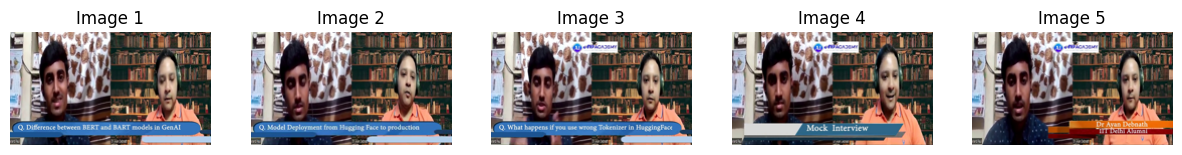

In [5]:
import torch
from sentence_transformers import SentenceTransformer
from transformers import CLIPProcessor, CLIPModel, AutoTokenizer, AutoModelForSeq2SeqLM
import faiss
from PIL import Image

# Load text model for encoding sentences
text_model = SentenceTransformer('all-MiniLM-L6-v2')

# Load CLIP model and processor for handling image and text queries
clip_model = CLIPModel.from_pretrained("openai/clip-vit-base-patch32")
clip_processor = CLIPProcessor.from_pretrained("openai/clip-vit-base-patch32")

# Load FLAN-T5 model for question understanding and response generation
flan_t5_model_name = "google/flan-t5-large"
flan_t5_tokenizer = AutoTokenizer.from_pretrained(flan_t5_model_name)
flan_t5_model = AutoModelForSeq2SeqLM.from_pretrained(flan_t5_model_name)

# Load FAISS indices for text and image embeddings
text_index = faiss.read_index("./mixed_data/vector_store/text_index.faiss")
image_index = faiss.read_index("./mixed_data/vector_store/image_index.faiss")

# Function to retrieve relevant text and images based on the query
def retrieve(query_str, top_k=5):
    # Get text embeddings for the query
    text_query_embedding = text_model.encode(query_str)
    
    # Get image embeddings for the query using CLIP
    clip_inputs = clip_processor(text=[query_str], return_tensors="pt", padding=True, truncation=True)#CLIPProcessor from the Hugging Face transformers library, which preprocesses the input text to the format required by the CLIP model.
    #return_tensors="pt":
    #This parameter specifies that the output should be in PyTorch tensor format ("pt" stands for PyTorch).
    #padding=True:
    #This adds padding to the text to ensure that all texts in the batch are of the same length.
    #truncation=True:
    #This truncates the text if it exceeds the maximum length that the model can handle.



    with torch.no_grad():
        #with torch.no_grad(): It deactivates autograd, which reduces memory usage and speeds up computations. This is used because we're only doing inference (not training), and we don't need to calculate gradients.
        image_query_embedding = clip_model.get_text_features(**clip_inputs).squeeze().numpy()
        #**clip_inputs:  unpacks the dictionary clip_inputs so that its key-value pairs are passed as keyword arguments to the get_text_features method.
        #squeeze: removes any dimensions of size 1 from the tensor. For example, if the tensor has a shape of (1, 512), it will be squeezed to (512).
        
    # Search in FAISS text index
    text_distances, text_indices = text_index.search(text_query_embedding.reshape(1, -1).astype('float32'), top_k)
    #text_index.search(...):
    #This method performs a search in the FAISS index for the closest vectors (embeddings) to the given query embedding.
    #.reshape(1, -1) reshapes the embedding to have one row and as many columns as needed (i.e., the number of dimensions in the embedding).
    #This reshaping is necessary because FAISS expects a 2D array with the shape (number of queries, dimension of embeddings).
    #top_k:This parameter specifies the number of nearest neighbors (top results) to retrieve.


    # Search in FAISS image index
    image_distances, image_indices = image_index.search(image_query_embedding.reshape(1, -1).astype('float32'), top_k)

    # Read metadata file containing paths to text and images
    with open("./mixed_data/vector_store/metadata.txt", "r") as f:
        metadata = f.read().splitlines()

    # Retrieve relevant text and image results
    text_results = [metadata[0]] if text_indices[0][0] != -1 else []#initializes text_results based on whether a valid closest text embedding was found. If found, it uses the first item in metadata; otherwise, it sets text_results to an empty list.
    image_results = [metadata[i+1] for i in image_indices[0] if i != -1]#image_indices is a 2D array where each element represents the index of a retrieved image embedding in the original dataset.
    #The code constructs image_results by iterating over the indices of retrieved image embeddings, checking for valid results, and then retrieving the corresponding metadata for each valid index. The resulting list contains metadata items for all valid image indices.
    return text_results, image_results

# Function to generate a response based on the context and query
def generate_response(context_str, query_str):
    # Prepare input text for the model
    input_text = f"Context: {context_str}\nQuestion: {query_str}\nAnswer:"
    
    # Tokenize the input text
    inputs = flan_t5_tokenizer(input_text, return_tensors="pt", max_length=1024, truncation=True)
    
    # Generate a response using the FLAN-T5 model
    with torch.no_grad():# which means that the code inside this block will not calculate gradients. This is useful for inference because it reduces memory consumption and speeds up computation.
        outputs = flan_t5_model.generate(
            **inputs,
            max_length=150,
            num_return_sequences=1,
            temperature=0.7,
            do_sample=True,#do_sample to True means that the model will use sampling for generating text instead of simply choosing the most probable next token. This introduces variability and creativity into the generated text.
            top_k=50,#top_k parameter limits the sampling pool to the top 50 most probable next tokens. This helps to reduce the risk of choosing improbable tokens and can improve the coherence of the generated text.
            top_p=0.95#This ensures that only the most probable tokens are considered, adding a layer of randomness while maintaining coherence.
        )
    
    # Decode the generated response back to text
    response = flan_t5_tokenizer.decode(outputs[0], skip_special_tokens=True)
    return response

# Function to answer a question based on the query
def answer_question(query_str):
    # Retrieve relevant text and image paths
    text_results, image_results = retrieve(query_str)
    
    # Read the content of the retrieved text file
    with open(text_results[0], 'r', encoding='utf-8') as f:
        context_str = f.read()
    
    # Generate a response based on the context and query
    answer = generate_response(context_str, query_str)
    
    # Load and resize images for display
    images = []
    for image_path in image_results:
        img = Image.open(image_path)
        img.thumbnail((200, 200))  # Resize image for display
        images.append(img)
    
    return answer, images

# Example usage of the functions
query = "Can you summarize the main points covered in the video?"
answer, relevant_images = answer_question(query)

# Print the generated answer
print("Answer:")
print(answer)

import matplotlib.pyplot as plt

# Display relevant images
def display_images(images):
    print("\nRelevant Images:")
    fig, axes = plt.subplots(1, len(images), figsize=(15, 5))  # Create a subplot for each image
    if len(images) == 1:
        axes = [axes]  # Ensure axes is iterable when there's only one image
    for i, (ax, img) in enumerate(zip(axes, images)):
        ax.imshow(img)
        ax.set_title(f"Image {i+1}")
        ax.axis('off')  # Hide axes
    plt.show()

# Call the function to display the images
display_images(relevant_images)
 # Display the image (this might need adjustment based on your environment)
